# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
#See wich cities we have randomly selected
print(cities)

['port alfred', 'tiksi', 'pauini', 'monrovia', 'tezu', 'sao joao da barra', 'osorno', 'high level', 'bull savanna', 'rio grande', 'east london', 'pacific grove', 'bluff', 'bandarbeyla', 'hithadhoo', 'puerto ayora', 'cockburn town', 'hobart', 'belushya guba', 'beringovskiy', 'avarua', 'clyde river', 'krasnoselkup', 'wladyslawowo', 'punta arenas', 'rikitea', 'margate', 'klaksvik', 'pathein', 'arraial do cabo', 'cape town', 'barentsburg', 'butembo', 'faya', 'waingapu', 'port-gentil', 'mar del plata', 'chokurdakh', 'yeppoon', 'la salle', 'hermanus', 'butaritari', 'airai', 'yellowknife', 'eyl', 'mataura', 'lima', 'saint-joseph', 'zhangjiakou', 'katsuura', 'jamestown', 'samarai', 'vaitupu', 'souillac', 'neiafu', 'nikolskoye', 'chinsali', 'sentyabrskiy', 'vao', 'vaini', 'sala consilina', 'busselton', 'kashi', 'ushuaia', 'dunedin', 'taolanaro', 'ancud', 'thompson', 'ostrovnoy', 'beaumont', 'new norfolk', 'sterling', 'lebu', 'coueron', 'tuktoyaktuk', 'asau', 'lagoa', 'upernavik', 'chapais', 'my

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#See the structure of our info
#url = 'https://api.openweathermap.org/data/2.5/weather?'
#query_url = url + 'q=' + "puebla" + '&appid=' + api_key
#data = requests.get(query_url).json()
#print (data)

{'coord': {'lon': -98.2, 'lat': 19.04}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.915, 'pressure': 1015.65, 'humidity': 78, 'temp_min': 285.915, 'temp_max': 285.915, 'sea_level': 1015.65, 'grnd_level': 757.51}, 'wind': {'speed': 1.62, 'deg': 329.371}, 'clouds': {'all': 100}, 'dt': 1562989739, 'sys': {'message': 0.0058, 'country': 'MX', 'sunrise': 1562932941, 'sunset': 1562980442}, 'timezone': -18000, 'id': 3521081, 'name': 'Puebla', 'cod': 200}


In [11]:
city2 = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cities_dict = {}

url = 'https://api.openweathermap.org/data/2.5/weather?'
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")
for i in cities:
    query_url = url + 'q=' + i + '&appid=' + api_key
    data = requests.get(query_url).json()
    if(data['cod'] == 200):
        print("Processing data of " + str(i))
        city2.append(i)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
    else:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retreival complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing data of qaanaaq
City not found. Skipping...
Processing data of jalu
Processing data of provideniya
Processing data of tual
Processing data of cape town
Processing data of puerto ayora
City not found. Skipping...
Processing data of touros
Processing data of rikitea
Processing data of new norfolk
Processing data of kwinana
Processing data of punta arenas
Processing data of kawalu
Processing data of popondetta
Processing data of pindiga
Processing data of lorengau
City not found. Skipping...
Processing data of saint-pierre
Processing data of carballo
Processing data of ushuaia
City not found. Skipping...
City not found. Skipping...
Processing data of avarua
Processing data of yagodnoye
Processing data of bluff
Processing data of flin flon
Processing data of baykit
Processing data of palmer
Processing data of coihaique
Processing data of pisco
Processing data of kaitangata
Processing data of dar

Processing data of mayo
Processing data of pailon
Processing data of hailun
Processing data of solnechnyy
Processing data of meridian
Processing data of oussouye
Processing data of big rapids
Processing data of soc trang
Processing data of kalmunai
Processing data of kampong thum
Processing data of coquimbo
Processing data of luchow
Processing data of labuan
Processing data of nacozari
Processing data of gamba
Processing data of ravar
Processing data of soure
Processing data of virginia beach
Processing data of abha
Processing data of the hammocks
City not found. Skipping...
Processing data of tacuati
Processing data of lagoa
City not found. Skipping...
Processing data of oktyabrskiy
Processing data of glens falls
Processing data of luba
Processing data of nassau
City not found. Skipping...
Processing data of atasu
Processing data of cabinda
Processing data of guiren
Processing data of krasnoarmeysk
Processing data of ialibu
Processing data of tagusao
Processing data of mapimi
Processi

Processing data of matay
Processing data of livingston
Processing data of pyaozerskiy
Processing data of otake
Processing data of soledade
Processing data of dickinson
Processing data of baoying
Processing data of the pas
Processing data of boddam
Processing data of kang
Processing data of tucupita
Processing data of le pradet
Processing data of basoko
Processing data of whitehorse
Processing data of sorong
Processing data of willemstad
Processing data of jambi
Processing data of kollam
City not found. Skipping...
City not found. Skipping...
Processing data of tallahassee
Processing data of rafai
Processing data of kiunga
Processing data of plettenberg bay
Processing data of haines junction
-----------------------------
Data Retreival complete
-----------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
cities_dict = list(zip(city2,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed))
df = pd.DataFrame(cities_dict,columns=['City','Cloudiness',
                    'Country','Date','Humidity','Lat','Lng',
                        'Max Temp','Wind Speed'])
df.to_csv("Data.csv")
#df.count()
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,100,GL,1563081516,62,77.48,-69.36,279.697,4.96
1,jalu,0,LY,1563081415,49,29.03,21.55,300.297,3.79
2,provideniya,0,RU,1563081535,72,64.42,-173.23,287.197,2.77
3,tual,74,ID,1563081535,79,-5.67,132.75,298.497,8.53
4,cape town,0,ZA,1563081194,100,-33.93,18.42,288.150,4.10


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

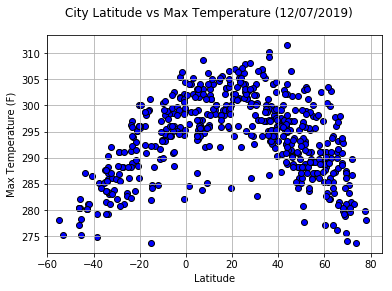

In [18]:
first_plot="lat_vs_temp"
axis_x=df["Lat"]
axis_y=df["Max Temp"]
title="City Latitude vs Max Temperature (12/07/2019)"
labelx="Latitude"
labely="Max Temperature (F)"
fig, first_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

first_plot.scatter(x, y, color='b', marker='o', edgecolors='black')
first_plot.grid()
first_plot.set_xlabel(labelx)
first_plot.set_ylabel(labely)
first_plot.set_xlim([-60,85])
fig.savefig("LatTemp.png")

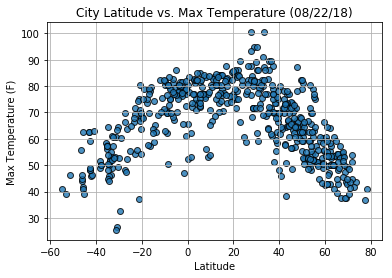

#### Latitude vs. Humidity Plot

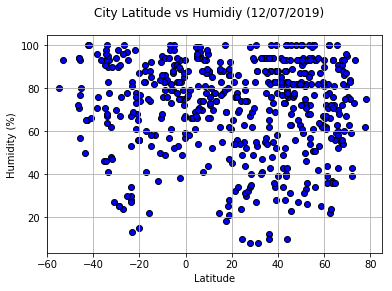

In [19]:
second_plot="lat_vs_hum"
axis_x=df["Lat"]
axis_y=df["Humidity"]
title="City Latitude vs Humidiy (12/07/2019)"
labelx="Latitude"
labely="Humidity (%)"
fig, second_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

second_plot.scatter(x, y, color='b', marker='o', edgecolors='black')
second_plot.grid()
second_plot.set_xlabel(labelx)
second_plot.set_ylabel(labely)
second_plot.set_xlim([-60,85])
fig.savefig("LatHum.png")

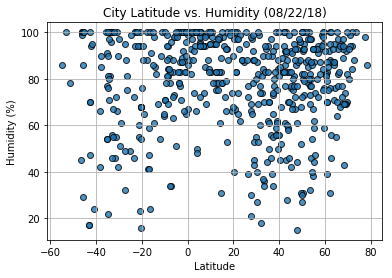

#### Latitude vs. Cloudiness Plot

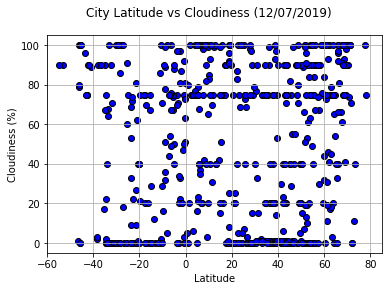

In [20]:
second_plot="lat_vs_cloud"
axis_x=df["Lat"]
axis_y=df["Cloudiness"]
title="City Latitude vs Cloudiness (12/07/2019)"
labelx="Latitude"
labely="Cloudiness (%)"
fig, second_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

second_plot.scatter(x, y, color='b', marker='o', edgecolors='black')
second_plot.grid()
second_plot.set_xlabel(labelx)
second_plot.set_ylabel(labely)
second_plot.set_xlim([-60,85])
fig.savefig("LatCloud.png")

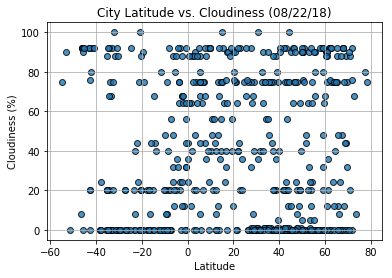

#### Latitude vs. Wind Speed Plot

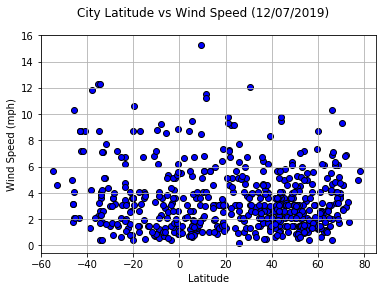

In [21]:
second_plot="lat_vs_wind"
axis_x=df["Lat"]
axis_y=df["Wind Speed"]
title="City Latitude vs Wind Speed (12/07/2019)"
labelx="Latitude"
labely="Wind Speed (mph)"
fig, second_plot = plt.subplots(figsize=(6,4))
fig.suptitle(title, fontsize='12')
    
x = axis_x
y = axis_y

second_plot.scatter(x, y, color='b', marker='o', edgecolors='black')
second_plot.grid()
second_plot.set_xlabel(labelx)
second_plot.set_ylabel(labely)
second_plot.set_xlim([-60,85])
fig.savefig("LatWind.png")

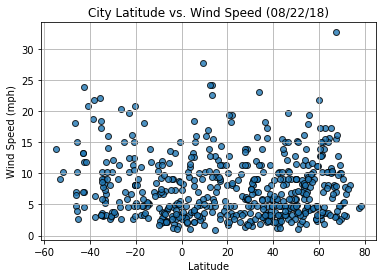